In [1]:
import scanpy as sc 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bbknn
import scvelo as scv
# sc.settings.set_figure_params(figsize=(5,4))
sc.settings.verbosity = 0
scv.settings.set_figure_params(dpi_save=400, facecolor='white', fontsize=7, format='jpg',)
sc.settings.set_figure_params(dpi_save=400, facecolor='white', fontsize=7, format='jpg')

In [2]:
adata = sc.read_h5ad('../data/manual_plot4.h5ad')
# adata_VSMC = sc.read_h5ad('../data/v4-sub-VSMC.h5ad')
# adata_fib = sc.read_h5ad('../data/v4-sub-fib.h5ad')
# adata_fls = sc.read_h5ad('../data/v4-sub-fls.h5ad')
# adata_m2 = sc.read_h5ad('../data/v4-sub-m2.h5ad')
# adata_end = sc.read_h5ad('../data/v4-sub-end.h5ad')

In [3]:
adata.obs['new_cls'] = list(adata.obs['leiden_poly'])

In [4]:
ldata = sc.read("../data/loom/aggr.loom", cache=True)

In [5]:
scv.utils.clean_obs_names(ldata)

In [6]:
adata = scv.utils.merge(adata,ldata)

In [7]:
adata

AnnData object with n_obs × n_vars = 36021 × 3000
    obs: 'sample', 'sample_batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_poly', 'sample_group', 'new_cls', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_poly_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

saving figure to file ./figures/scvelo_proportions.jpg


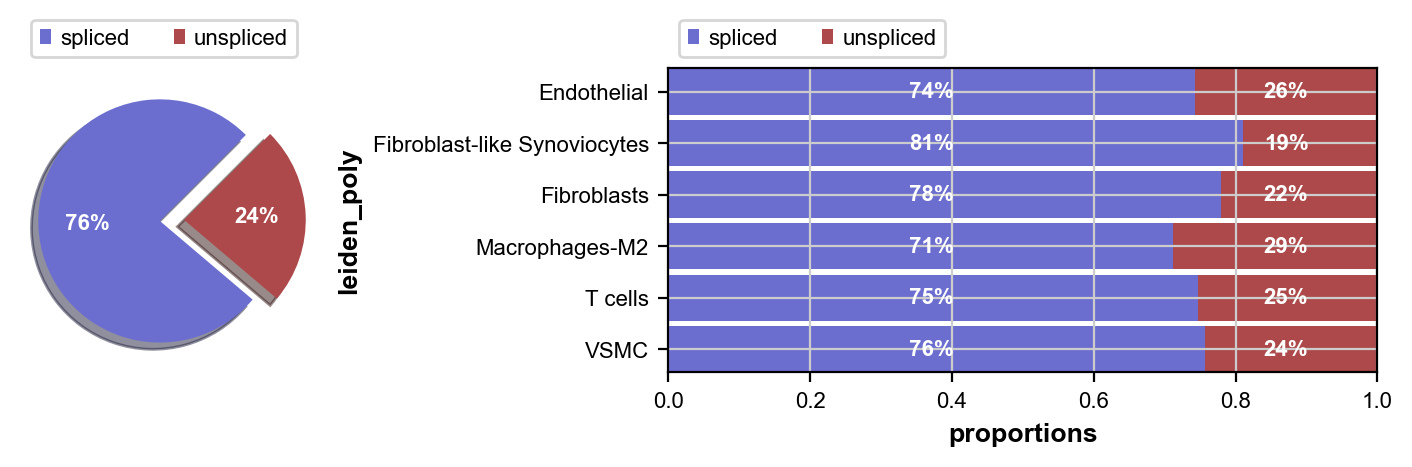

In [8]:
scv.pl.proportions(adata, groupby='leiden_poly',save=True)

In [9]:
# scv.tl.velocity(adata,)
scv.tl.velocity(adata,mode='deterministic') # `'deterministic'`, `'stochastic'` or `'dynamical'` 

Normalized count data: spliced, unspliced.
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:06) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [10]:
scv.tl.velocity_graph(adata,n_jobs=8)

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing velocity graph (using 8/8 cores)


  0%|          | 0/36021 [00:00<?, ?cells/s]

    finished (0:00:25) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:03) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_all.jpg


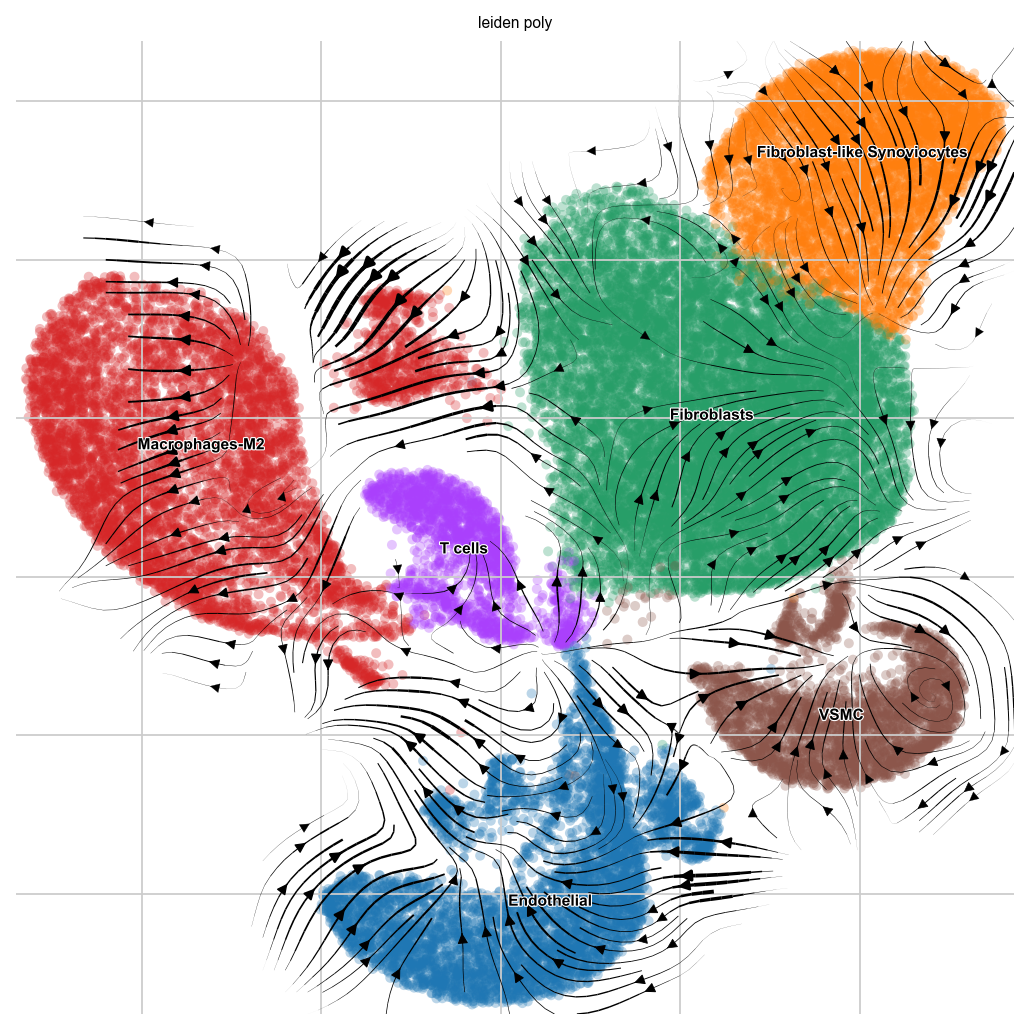

In [11]:
scv.pl.velocity_embedding_stream(adata, basis='X_umap', 
                                 color='leiden_poly',save='all',
                                size=80,
                                 density=3,
                                 smooth=1,
                                figsize=(8,8)
                                 
                                
                                )

/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)
/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


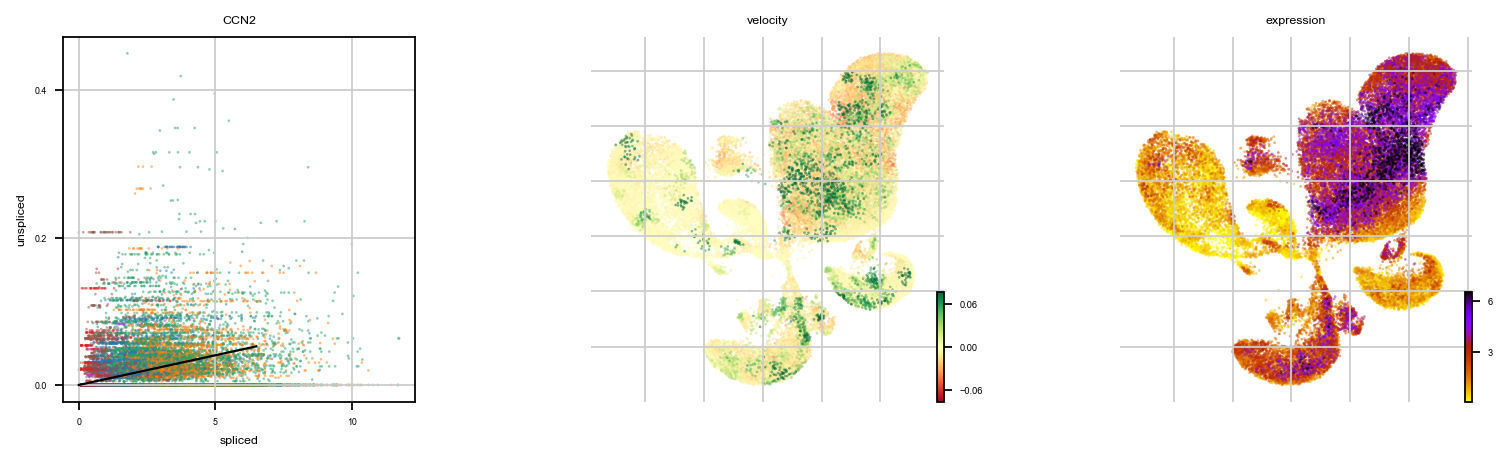

In [12]:
scv.pl.velocity(adata, ['CCN2'], ncols=2,figsize=(8,6),color='leiden_poly')

/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


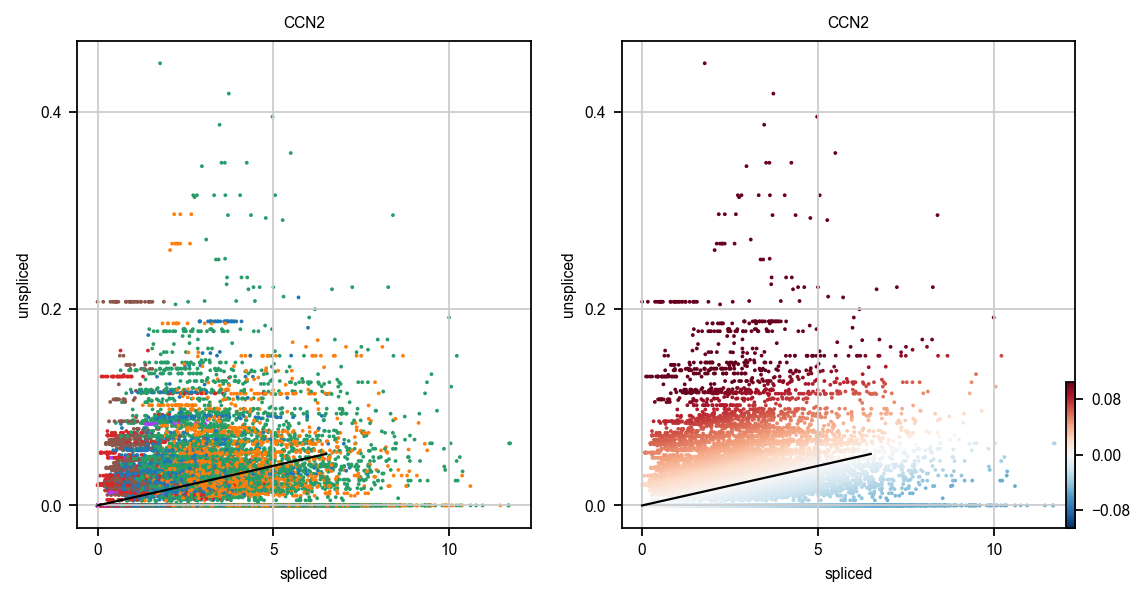

In [13]:
scv.pl.scatter(adata, 'CCN2', color=['leiden_poly', 'velocity'])

In [19]:
scv.tl.recover_dynamics(adata,n_jobs=6)

recovering dynamics (using 6/8 cores)


  0%|          | 0/940 [00:00<?, ?gene/s]

    finished (0:18:52) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [20]:
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:34) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [24]:
scv.tl.velocity_graph(adata)

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing velocity graph (using 1/8 cores)


  0%|          | 0/36021 [00:00<?, ?cells/s]

    finished (0:00:16) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_all_.jpg


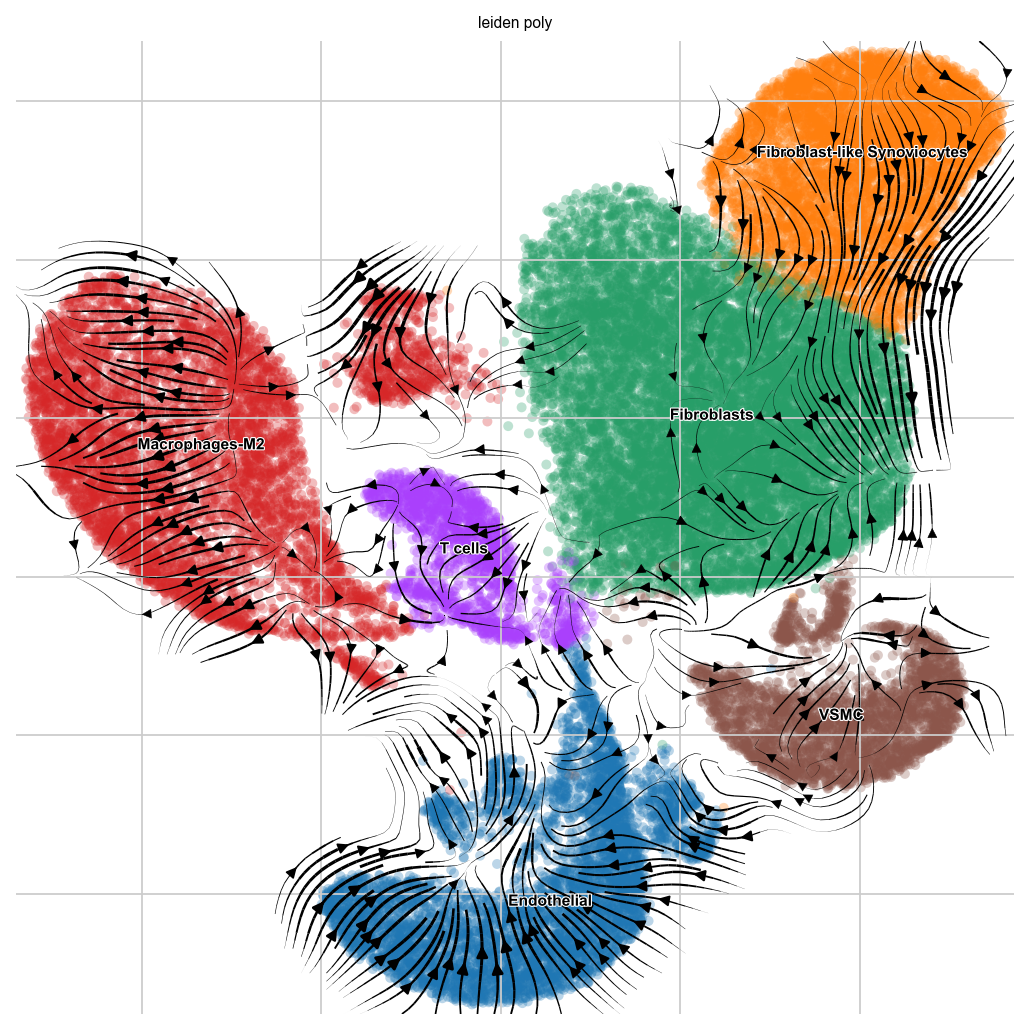

In [40]:
scv.pl.velocity_embedding_stream(adata, basis='X_umap', 
                                 color='leiden_poly',save='all_',
                                size=80,
                                 density=4,
                                 smooth=0.7,
                                figsize=(8,8)
                                 
                                
                                )

In [30]:
scv.tl.latent_time(adata)

computing latent time using root_cells as prior
    finished (0:00:07) --> added 
    'latent_time', shared time (adata.obs)


/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


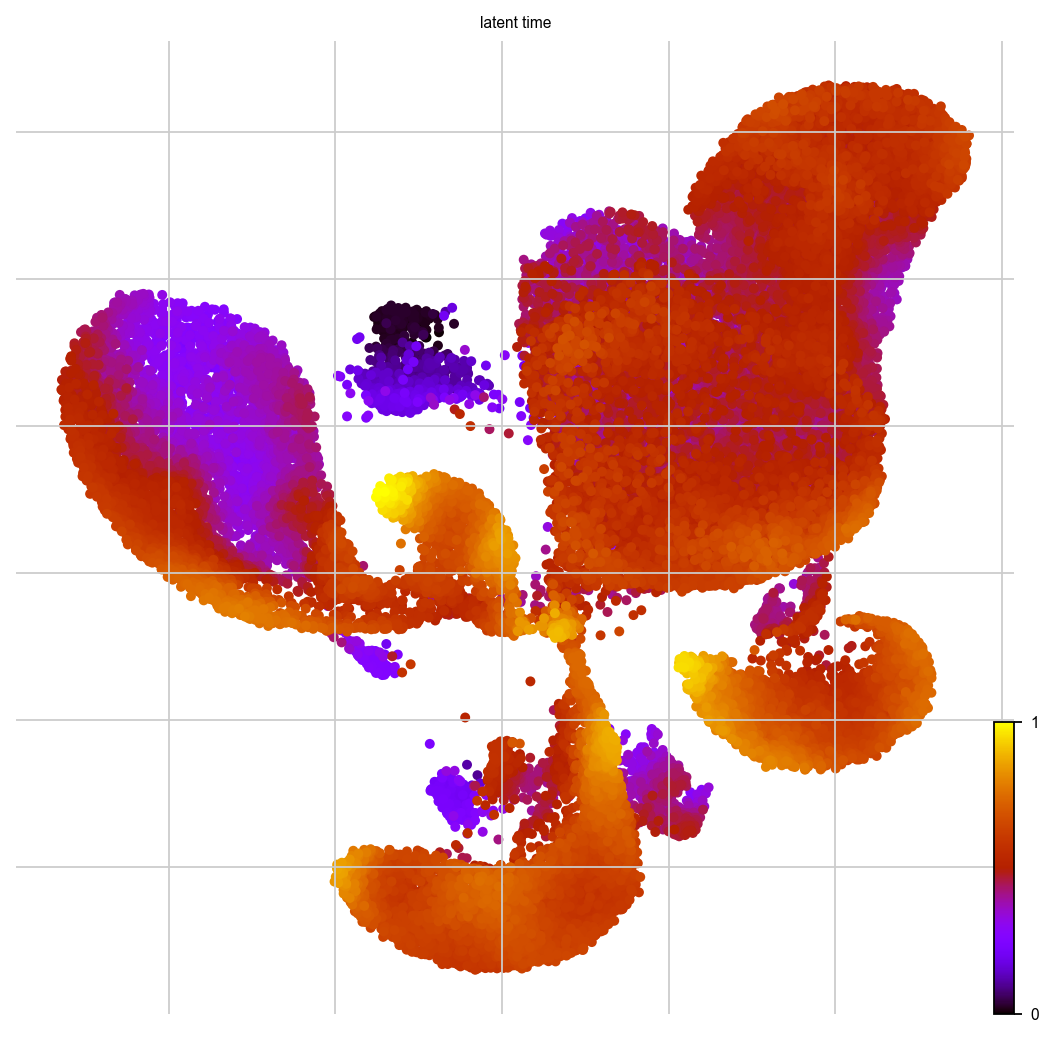

In [32]:
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80,figsize=(8,8))

In [36]:
adata

AnnData object with n_obs × n_vars = 36021 × 3000
    obs: 'sample', 'sample_batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_poly', 'sample_group', 'new_cls', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'fit_r2'
    uns: 'hvg', 'leiden', 'leiden_colors', 